# MAXIMUM LIKELIHOOD ESTIMATION   
Praveen Kumar
(16EC10042)

Here in this short notebook, I will try to implement maximum likelihood concept. I will be using numpy library for 
data extraction and manipulation. Also I will be using matplotlib library for purpose of visualising graphs.
Maximum likelihood concept says that given a set of samples and a probability distribution that we know that the 
samples have come from, we can estimate those parameters that define that probability distribution. In this way,
we estimate the actual probability distribution from the samples that we have. We need to estimate a parameter from a model. Generally, we select a model — let’s say a linear regression — and use observed data X to create the model’s parameters θ.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [65]:
norm.pdf(3, 3, 1)


0.3989422804014327

In [66]:
norm.pdf(3, 7, 2)


0.02699548325659403

In [67]:
norm.pdf(2, 4, 1)*norm.pdf(6, 4, 1)


0.0029150244650281948

In [68]:
x = [2, 3, 4, 5, 7, 8, 9, 10]

# We want to maximize the likelihood our parameter θ comes from this distribution.
To make things simpler I am going to take the log of the equation. our parameter x was likely to appear in a distribution with certain parameters. Now we can call this our likelihood equation, and when we take the log of the equation PDF equation.



In [71]:
# Compare the likelihood of the random samples to the two 
# distributions
def compare_data_to_dist(x, mu_1=5, mu_2=8, sd_1=3, sd_2=3):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(norm.pdf(i, mu_2, sd_2))
    
    print("The LL of of x for mu = 5 and sd = 3 is:", ll_1)
    print("The LL of of x for mu = 8 and sd = 3 is:",ll_2)
compare_data_to_dist(x)

The LL of of x for mu = 5 and sd = 3 is: -19.918184352760036
The LL of of x for mu = 8 and sd = 3 is: -21.251517686093372


# Let’s look at the visualization of how the MLE for θ_mu and θ_sigma is determined.
Consider the code below, which expands on the graph of the single likelihood function above.

C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


The max LL for sd 1.00 is -37.39
The max LL for sd 1.50 is -23.94
The max LL for sd 2.50 is -19.49
The max LL for sd 3.00 is -19.48
The max LL for sd 3.50 is -19.83


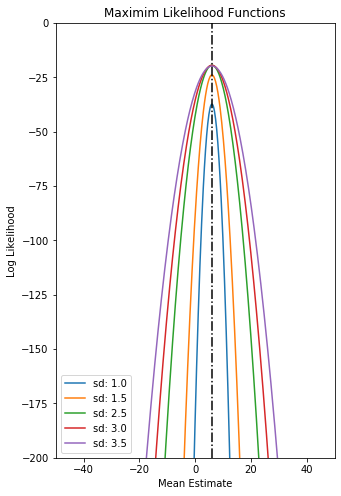

In [72]:
# Plot the Maximum Likelihood Functions for different values of mu 
# and sigma
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(-200,0)
    plt.xlim(-50, 50)
    mu_set = np.linspace(-100, 100, 1000)
    sd_set = [ 1, 1.5, 2.5, 3, 3.5]
    max_val = max_val_location = None
    for i in sd_set:
        ll_array = []
        
        for j in mu_set:
            temp_mm = 0
            
            for k in x:
                temp_mm += np.log(norm.pdf(k, j, i)) # The LL function
            ll_array.append(temp_mm)
        
            if (max_val is None):
                max_val = max(ll_array)
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.1f" % i)
        
        print("The max LL for sd %.2f is %.2f" % (i, max(ll_array)))    
    plt.axvline(x=max_val_location, color='black', ls='-.')
    plt.legend(loc='lower left')
plot_ll(x);

# To estimate the gaussian distribution parameters using maximum likelihood method so I can use the estimated values in my classifier

In [73]:
import numpy as np

def gaussian_mle(data):                                                                                                                                                                               
    mu = data.mean(axis=0)                                                                                                                                                                            
    var = (data-mu).T @ (data-mu) / data.shape[0] #  this is slightly suboptimal, but instructive

    return mu, var 

In [74]:
mean = [1.0, 3.14]                                                                                                                                                                                    
cov = [[2.0, 0.5], [0.5, 10]]                                                                                                                                                                         
data = np.random.multivariate_normal(mean, cov, 10000)                                                                                                                                                

print(gaussian_mle(data))

(array([1.00398547, 3.08913148]), array([[ 1.97530271,  0.53579443],
       [ 0.53579443, 10.18098652]]))


# Maximum Likelihood Curve/Model Fitting using sigmoid function. The advantage of the Sigmoid function is that its derivative is easy to calculate.  Since the sigmoid function gives values between 0 and 1, these values can be interpreted as uncertainties for the outputs of 0 and 1.

[0.86603581 3.47620973 0.05449688]


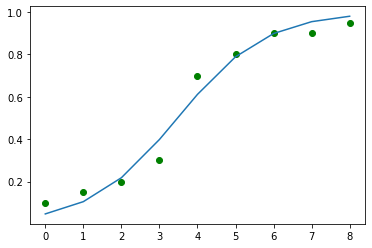

In [75]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
import pylab as py

ydata = np.array([0.1,0.15,0.2,0.3,0.7,0.8,0.9, 0.9, 0.95])
xdata = np.array(range(0,len(ydata),1))

def sigmoid(params):
    k = params[0]
    x0 = params[1]   
    sd = params[2]

    yPred = 1 / (1+ np.exp(-k*(xdata-x0)))

    # Calculate negative log likelihood
    LL = -np.sum( stats.norm.logpdf(ydata, loc=yPred, scale=sd ) )

    return(LL)


initParams = [1, 1, 1]

results = minimize(sigmoid, initParams, method='Nelder-Mead')
print(results.x)

estParms = results.x
yOut = yPred = 1 / (1+ np.exp(-estParms[0]*(xdata-estParms[1])))

py.clf()
py.plot(xdata,ydata, 'go')
py.plot(xdata, yOut)
py.show()

# To fit double exponential distribution using MLE

      fun: 1659058.927725293
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.9778887 , 19.09211278])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 63
      nit: 9
   status: 0
  success: True
        x: array([0.04296096, 0.00197746])


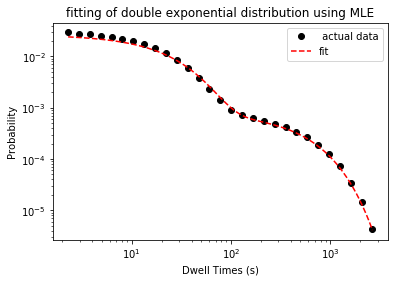

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats as stats

size = 300000
nbins = 30

def simu_dt():
    ## simulate Exp2 data
    np.random.seed(20)
    ## generate random values between 0 to 1
    x = np.random.rand(size)
    data = []
    for n in x:
        if n < 0.6:
            # generating 1st exp data
            data.append(np.random.exponential(scale=20)) # t1
        else:
            # generating 2nd exp data
            data.append(np.random.exponential(scale=500)) # t2
    return np.array(data)

ydata2 = simu_dt() # call to generate simulated data
## trimming the data at the beginning and the end a bit
ydata2 = ydata2[np.where(2 < ydata2)]
ydata2 = ydata2[np.where(ydata2 < 3000)]

## creating the normalized log binned histogram data
bins = 10 ** np.linspace(np.log10(np.min(ydata2)), np.log10(np.max(ydata2)), nbins)
counts, bin_edges = np.histogram(ydata2, bins=bins)
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = (bin_edges[1:] - bin_edges[:-1])
counts = counts / bin_width / np.sum(counts)

## generating arbitrary x value
x1 = np.linspace(bin_centres.min(), bin_centres.max(), len(ydata2))

def MLE(params):
    """ find the max likelihood """
    k1, k2 = params
    yPred = 0.6*k1*np.exp(-k1*ydata2) + 0.4*k2*np.exp(-k2*ydata2)
    negLL = -np.sum(np.log(yPred))
    return negLL

guess = np.array([1/30, 1/200])
bnds = ((1/100, 1/2), (1/1000, 1/100))
## best function used for global fitting

results = optimize.minimize(MLE, guess, bounds=bnds)

print(results)
K1, K2 = results.x
y_fitted = 0.6*K1*np.exp(-K1*x1) + 0.4*K2*np.exp(-K2*x1)

## plot actual data
plt.plot(bin_centres, counts, 'ko', label=" actual data")
plt.xlabel("Dwell Times (s)")
plt.ylabel("Probability")
plt.title("fitting of double exponential distribution using MLE")

## plot fitted data on original data
plt.plot(x1, y_fitted, c='r', linestyle='dashed', label="fit")
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.show()
